In [6]:
# 10명의 기록마다 컬럼명이 새로 생기므로 이를 없애줌
while True:
    try:
        p_list.remove(['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', '비율', 'WAR', 'WPA'])
        p_list.remove(['WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+'])
    except:
        print('삭제완료')
        break

삭제완료


In [7]:
# (2021시즌 기록의 경우) ERA+ 지표가 생성되지 않은 선수들에 대해 np.nan값 입력
import numpy as np

for p in p_list:
    if len(p) != 33:
        p.insert(29, np.nan)

In [10]:
# 각 선수들의 기록을 행 형태로 삽입하기 위하여 Series 형태로 변환 뒤 df에 삽입
for p in p_list:
    pitch_df = pitch_df.append(pd.Series(p, index=pitch_df.columns), ignore_index=True)

In [11]:
pitch_df.head()

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR
0,1,미란다,21두,7.09,28,1,1,28,14,5,...,225,1,7,2.33,2.67,1.14,185.0,161.1,7.09,3.27
1,2,백정현,21삼,5.28,27,0,0,27,14,5,...,109,0,5,2.63,4.21,1.24,171.9,107.3,5.28,1.78
2,3,고영표,21K,5.23,26,1,1,25,11,6,...,130,0,1,2.92,3.19,1.04,154.0,139.2,5.23,2.27
3,4,켈리,21L,4.96,30,0,0,30,13,8,...,142,1,7,3.15,3.76,1.24,136.8,115.1,4.96,1.61
4,5,원태인,21삼,4.76,26,0,0,26,14,7,...,129,1,5,3.06,3.65,1.25,147.4,123.4,4.76,2.41


In [12]:
pitch_df.shape

(308, 33)

In [13]:
# 시즌과 팀 이름 분리
pitch_df['시즌'] = pitch_df.팀.str[:2]
pitch_df['팀'] = pitch_df.팀.str[2:]
pitch_df.head()

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,미란다,두,7.09,28,1,1,28,14,5,...,1,7,2.33,2.67,1.14,185.0,161.1,7.09,3.27,21
1,2,백정현,삼,5.28,27,0,0,27,14,5,...,0,5,2.63,4.21,1.24,171.9,107.3,5.28,1.78,21
2,3,고영표,K,5.23,26,1,1,25,11,6,...,0,1,2.92,3.19,1.04,154.0,139.2,5.23,2.27,21
3,4,켈리,L,4.96,30,0,0,30,13,8,...,1,7,3.15,3.76,1.24,136.8,115.1,4.96,1.61,21
4,5,원태인,삼,4.76,26,0,0,26,14,7,...,1,5,3.06,3.65,1.25,147.4,123.4,4.76,2.41,21


In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver import ActionChains
import time
import warnings
warnings.filterwarnings('ignore')

def crawler(year_xpath):
    # Chromedriver 옵션 설정
    options = webdriver.ChromeOptions()
    options.add_argument("headless")
    options.add_argument("window-size=976,1056")

    # execute driver & connect page
    driver = webdriver.Chrome('./chromedriver', options=options)
    driver.get('http://www.statiz.co.kr/stat.php?re=1&lr=0')
    time.sleep(3)

    # 스크롤을 위한 ActionChains 모듈 선언
    action = ActionChains(driver)
    
    # 연도 옵션 설정
    yearbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/button')
    time.sleep(2)
    yearbutton.click()
    
    # 연도 지정
    time.sleep(2)
    year_select = driver.find_element_by_xpath(year_xpath)
    driver.execute_script("window.scrollTo(0, 200);") # 광고로 인해 옵션버튼이 가려질 수 있으므로
    year_text = year_select.text
    year_select.click()
    
    # 100개씩 정렬하기 위한 옵션설정
    optionbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[8]/button')
    driver.execute_script("window.scrollTo(0, 100);") # 광고로 인해 옵션버튼이 가려질 수 있으므로
    time.sleep(2)
    optionbutton.click()

    # 정렬 개수 100개로 설정
    print_num = Select(driver.find_element_by_xpath('//*[@id="opt_div"]/div[2]/div[5]/form/select'))
    print_num.select_by_value('100')

    # 첫번째 다음버튼 선언 (2페이지부터는 '이전'버튼이 생겨 xpath가 바뀜)
    if year_text == '21':
        first_nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[6]/div/div/div[4]/table/tbody/tr/td[2]/a[2]')
    else:
        first_nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[5]/div/div/div[4]/table/tbody/tr/td[2]/a[2]')
        
    p_list = []
    count = 0
    while True:
        player = driver.find_element_by_id('mytable') # 크롤링 대상인 지표만을 선정
        count += 1
        for p in player.find_elements_by_tag_name('tr'):
            record = p.text
            p_list.append(record.split()) # 한 선수마다 하나의 list로 만들어서 저장
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # 맨 아래까지 스크롤, 광고로 가려짐을 피하기 위해
        if year_text == '21':
            nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[6]/div/div/div[4]/table/tbody/tr/td[2]/a[3]')
        else :
            nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[5]/div/div/div[4]/table/tbody/tr/td[2]/a[3]')
        time.sleep(2)
        if count == 1: # 첫 번째 페이지일 때
            first_nextbutton.click()
            time.sleep(2)
        else: # 두 번째 페이지 이상일 때
            if nextbutton.text == '마지막':
                print(count, '페이지 수집완료.')
                break
            nextbutton.click()
            time.sleep(2)
            
    return p_list

In [5]:
# 82년도부터 21년도까지의 xpath 주소
xpath_list = []

for i in range(2, 42):
    xpath_list.append('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[{0}]'.format(i))

['/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[2]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[3]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[4]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[5]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[6]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[7]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[8]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[9]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[10]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[11]', '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[

In [3]:
crawling_list = []

for x in xpath_list:
    crawling_list.append(crawler(x))

3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
4 페이지 수집완료.


In [4]:
import numpy as np
import pandas as pd

def data_clear(crawling_list) :
    # 10명의 기록마다 컬럼명이 새로 생기므로 이를 없애줌
    while True:
        try:
            crawling_list.remove(['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', '비율', 'WAR', 'WPA'])
            crawling_list.remove(['WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+'])
        except:
            print('삭제완료')
            break
        
    
    remove_list = []
    
    for c in crawling_list:
        if len(c) < 33:
            remove_list.append(c)
            
    for r in remove_list:
        crawling_list.remove(r)
        
    # dataframe에 사용할 컬럼명 list로 선언
    record_col = ['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WPA', 'WAR']
    
    # 컬럼만 있는 빈 데이터프레임 생성
    pitch_df = pd.DataFrame(columns=record_col)
    
    # 각 선수들의 기록을 행 형태로 삽입하기 위하여 Series 형태로 변환 뒤 df에 삽입
    for c in crawling_list:
        pitch_df = pitch_df.append(pd.Series(c, index=pitch_df.columns), ignore_index=True)
        
    # 시즌과 팀 이름 분리
    pitch_df['시즌'] = pitch_df.팀.str[:2]
    pitch_df['팀'] = pitch_df.팀.str[2:]
    
    return pitch_df

In [6]:
# dataframe에 사용할 컬럼명 list로 선언
record_col = ['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WPA', 'WAR']

In [7]:
import pandas as pd

# 컬럼만 있는 빈 데이터프레임 생성
pitch_df = pd.DataFrame(columns=record_col)
pitch_df

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR


In [8]:
for c in crawling_list:
    df = data_clear(c)
    pitch_df = pd.concat([pitch_df, df])

삭제완료
삭제완료
삭제완료
삭제완료
삭제완료
삭제완료
삭제완료
삭제완료


In [26]:
pitch_df = pitch_df.astype({'이닝':'float'})

In [12]:
pitch_df.columns

Index(['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크',
       '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WPA', 'WAR', '시즌'],
      dtype='object')

---
## 2월 5일 칼럼 - [KBO] 투수 규정이닝을 낮춰야 할까?
- https://minding-deep-learning.tistory.com/96

In [41]:
pitch_list = [pitch_14, pitch_15, pitch_16, pitch_17, pitch_18, pitch_19, pitch_20, pitch_21]

for p in pitch_list:
    print(p[p['이닝'] >= 144].shape[0])

18
20
17
19
25
27
20
19


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

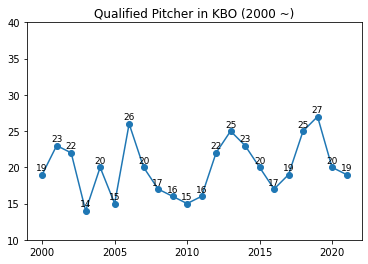

In [27]:
x = range(2000, 2022)
y = qualified[18:]
graph = plt.plot(x, y, marker='o')
plt.ylim(10, 40)
plt.title('Qualified Pitcher in KBO (2000 ~)')
# plt.figure(figsize=(10,6))

for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height+0.3, '%.0f' %height, ha='center', va='bottom', size=9)

plt.show()

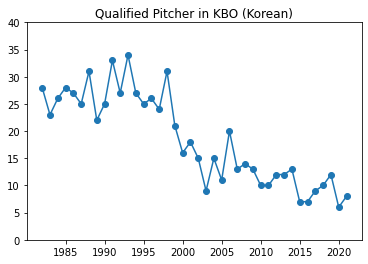

In [16]:
x = range(1982, 2022)
y = korean
graph = plt.plot(x, y, marker='o')
plt.ylim(0, 40)
plt.title('Qualified Pitcher in KBO (Korean)')

plt.show()

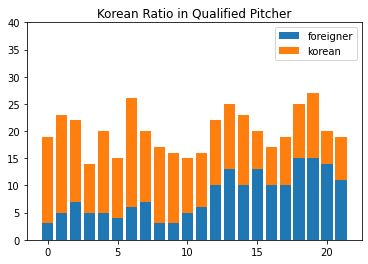

In [40]:
bar = plt.bar(range(len(foreign[18:])), foreign[18:])
bar = plt.bar(range(len(korean[18:])), korean[18:], bottom=foreign[18:])
plt.ylim(0, 40)
plt.title('Korean Ratio in Qualified Pitcher')
plt.legend(['foreigner', 'korean'])

plt.show()

In [1]:
qualified = [28, 23, 26, 28, 27, 25, 31, 22, 25, 33, 27, 34, 27, 25, 26, 24, 31, 21, 19, 23, 22, 14, 20, 15, 26, 20, 17, 16, 15, 16, 22, 25, 23, 20, 17, 19, 25, 27, 20, 19]

In [2]:
# 00년부터 외국인투수
foreign = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3, 5, 7, 5, 5, 4, 6, 7, 3, 3, 5, 6, 10, 13, 10, 13, 10, 10, 15, 15, 14, 11]

In [39]:
korean = []

for i in range(len(qualified)):
    korean.append(qualified[i] - foreign[i])

In [41]:
print(korean)

[28, 23, 26, 28, 27, 25, 31, 22, 25, 33, 27, 34, 27, 25, 26, 24, 31, 21, 16, 18, 15, 9, 15, 11, 20, 13, 14, 13, 10, 10, 12, 12, 13, 7, 7, 9, 10, 12, 6, 8]


In [26]:
import numpy as np

np.mean(qualified[:18])

26.833333333333332

---
## 2월 12일 칼럼 - KBO 명예의 전당에 헌액될 선수는 누구일까?
- https://minding-deep-learning.tistory.com/97?category=1037020

### 1. 데이터 수집 및 정제

In [1]:
import pandas as pd
import numpy as np
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver import ActionChains
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 82년도부터 21년도까지의 xpath 주소
xpath_list = []

for i in range(2, 42):
    xpath_list.append('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[{0}]'.format(i))

In [3]:
def crawler(page_address, year_xpath):
    # Chromedriver 옵션 설정
    options = webdriver.ChromeOptions()
    options.add_argument("headless")
    options.add_argument("window-size=976,1056")

    # execute driver & connect page
    driver = webdriver.Chrome('./chromedriver', options=options)
    driver.get(page_address)
    time.sleep(3)

    # 스크롤을 위한 ActionChains 모듈 선언
    action = ActionChains(driver)
    
    # 연도 옵션 설정
    yearbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/button')
    time.sleep(2)
    yearbutton.click()
    
    # 연도 지정
    time.sleep(2)
    year_select = driver.find_element_by_xpath(year_xpath)
    driver.execute_script("window.scrollTo(0, 200);") # 광고로 인해 옵션버튼이 가려질 수 있으므로
    year_text = year_select.text
    year_select.click()
    
    # 100개씩 정렬하기 위한 옵션설정
    # optionbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[8]/button')
    # driver.execute_script("window.scrollTo(0, 100);") # 광고로 인해 옵션버튼이 가려질 수 있으므로
    # time.sleep(2)
    # optionbutton.click()

    # 정렬 개수 100개로 설정
    # print_num = Select(driver.find_element_by_xpath('//*[@id="opt_div"]/div[2]/div[5]/form/select'))
    # print_num.select_by_value('100')

    # 첫번째 다음버튼 선언 (2페이지부터는 '이전'버튼이 생겨 xpath가 바뀜)
    if year_text == '21':
        first_nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[6]/div/div/div[4]/table/tbody/tr/td[2]/a[2]')
    else:
        first_nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[5]/div/div/div[4]/table/tbody/tr/td[2]/a[2]')
        
    p_list = []
    count = 0
    while True:
        player = driver.find_element_by_id('mytable') # 크롤링 대상인 지표만을 선정
        count += 1
        for p in player.find_elements_by_tag_name('tr'):
            record = p.text
            p_list.append(record.split()) # 한 선수마다 하나의 list로 만들어서 저장
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # 맨 아래까지 스크롤, 광고로 가려짐을 피하기 위해
        if year_text == '21':
            nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[6]/div/div/div[4]/table/tbody/tr/td[2]/a[3]')
        else :
            nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[5]/div/div/div[4]/table/tbody/tr/td[2]/a[3]')
        time.sleep(2)
        if count == 1: # 첫 번째 페이지일 때
            first_nextbutton.click()
            time.sleep(2)
        else: # 두 번째 페이지 이상일 때
            if nextbutton.text == '마지막':
                print(count, '페이지 수집완료.')
                break
            nextbutton.click()
            time.sleep(2)
            
    return p_list

In [5]:
def pitch_data_clear(crawling_list) :
    # 10명의 기록마다 컬럼명이 새로 생기므로 이를 없애줌
    while True:
        try:
            crawling_list.remove(['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', '비율', 'WAR', 'WPA'])
            crawling_list.remove(['WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+'])
        except:
            break
        
    
    data_list = []
    
    for c in crawling_list:
        data_list.append(c[:17])
        
    # dataframe에 사용할 컬럼명 list로 선언
    record_col = ['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타']
    
    # 컬럼만 있는 빈 데이터프레임 생성
    pitch_df = pd.DataFrame(columns=record_col)
    
    # 각 선수들의 기록을 행 형태로 삽입하기 위하여 Series 형태로 변환 뒤 df에 삽입
    for d in data_list:
        pitch_df = pitch_df.append(pd.Series(d, index=pitch_df.columns), ignore_index=True)
        
    # 시즌과 팀 이름 분리
    # pitch_df['시즌'] = pitch_df.팀.str[:2]
    # pitch_df['팀'] = pitch_df.팀.str[2:]
    
    return pitch_df

In [6]:
def bat_data_clear(crawling_list) :
    # 10명의 기록마다 컬럼명이 새로 생기므로 이를 없애줌
    while True:
        try:
            crawling_list.remove(['순', '이름', '팀', '정렬', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '비율', 'WAR*', 'WPA'])
            crawling_list.remove(['WAR*', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+'])
        except:
            break
        
    
    data_list = []
    
    for c in crawling_list:
        data_list.append(c[:23])
        
    # dataframe에 사용할 컬럼명 list로 선언
    record_col = ['순', '이름', '팀', '정렬', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비']
    
    # 컬럼만 있는 빈 데이터프레임 생성
    pitch_df = pd.DataFrame(columns=record_col)
    
    # 각 선수들의 기록을 행 형태로 삽입하기 위하여 Series 형태로 변환 뒤 df에 삽입
    for d in data_list:
        pitch_df = pitch_df.append(pd.Series(d, index=pitch_df.columns), ignore_index=True)
        
    # 시즌과 팀 이름 분리
    # pitch_df['시즌'] = pitch_df.팀.str[:2]
    # pitch_df['팀'] = pitch_df.팀.str[2:]
    
    return pitch_df

In [8]:
# dataframe에 사용할 컬럼명 list로 선언 (투수)
record_col = ['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타']

# 컬럼만 있는 빈 데이터프레임 생성
pitch_df = pd.DataFrame(columns=record_col)
pitch_df

for x in xpath_list:
    crawling_list = crawler('http://www.statiz.co.kr/stat.php?re=1&lr=0', x)
    df = pitch_data_clear(crawling_list)
    pitch_df = pd.concat([pitch_df, df])
    
pitch_df.to_csv('pitch82_21.csv')

2 페이지 수집완료.
2 페이지 수집완료.
2 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
4 페이지 수집완료.
4 페이지 수집완료.
4 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
8 페이지 수집완료.
9 페이지 수집완료.
9 페이지 수집완료.
8 페이지 수집완료.
9 페이지 수집완료.
9 페이지 수집완료.
10 페이지 수집완료.
11 페이지 수집완료.


In [9]:
# dataframe에 사용할 컬럼명 list로 선언 (투수)
record_col = ['순', '이름', '팀', '정렬', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비']

# 컬럼만 있는 빈 데이터프레임 생성
bat_df = pd.DataFrame(columns=record_col)
bat_df

for x in xpath_list:
    crawling_list = crawler('http://www.statiz.co.kr/stat.php?re=0&lr=0', x)
    df = bat_data_clear(crawling_list)
    bat_df = pd.concat([bat_df, df])
    
bat_df.to_csv('bat82_21.csv')

4 페이지 수집완료.
4 페이지 수집완료.
5 페이지 수집완료.
5 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
6 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
8 페이지 수집완료.
7 페이지 수집완료.
7 페이지 수집완료.
10 페이지 수집완료.
10 페이지 수집완료.
10 페이지 수집완료.
9 페이지 수집완료.
9 페이지 수집완료.
10 페이지 수집완료.
9 페이지 수집완료.
11 페이지 수집완료.
13 페이지 수집완료.
13 페이지 수집완료.
12 페이지 수집완료.
12 페이지 수집완료.
12 페이지 수집완료.
13 페이지 수집완료.
14 페이지 수집완료.


In [38]:
pitch_df = pd.read_csv('pitch82_21.csv')
bat_df = pd.read_csv('bat82_21.csv')

## 3. JAWS

In [19]:
pitch_grouped = pitch_df['정렬'].groupby(pitch_df['이름'])
pitch_season_count = pd.DataFrame(pitch_grouped.count())
pitch_over10y_player = pitch_season_count[pitch_season_count['정렬'] >= 7]

In [27]:
bat_grouped = bat_df['정렬'].groupby(bat_df['이름'])
bat_season_count = pd.DataFrame(bat_grouped.count())
bat_over10y_player = bat_season_count[bat_season_count['정렬'] >= 7]

In [28]:
pitch_over10y_list = list(pitch_over10y_player.index)
bat_over10y_list = list(bat_over10y_player.index)

In [29]:
record_col = ['이름' , '7시즌 WAR', '통산 WAR', 'JAWS']
pitch_jaws_df = pd.DataFrame(columns=record_col)
bat_jaws_df = pd.DataFrame(columns=record_col)

In [30]:
for p in pitch_over10y_list:
    war_7y = pitch_df[pitch_df['이름'] == p].sort_values(by='정렬', ascending=False)['정렬'][:7].sum()
    war_all = pitch_df[pitch_df['이름'] == p].sort_values(by='정렬', ascending=False)['정렬'].sum()
    data = {'이름' : p,
            '7시즌 WAR' : war_7y,
            '통산 WAR' : war_all,
            'JAWS' : (war_all + war_7y) / 2}
    pitch_jaws_df = pitch_jaws_df.append(data, ignore_index=True)

In [31]:
for b in bat_over10y_list:
    war_7y = bat_df[bat_df['이름'] == b].sort_values(by='정렬', ascending=False)['정렬'][:7].sum()
    war_all = bat_df[bat_df['이름'] == b].sort_values(by='정렬', ascending=False)['정렬'].sum()
    data = {'이름' : b,
            '7시즌 WAR' : war_7y,
            '통산 WAR' : war_all,
            'JAWS' : (war_all + war_7y) / 2}
    bat_jaws_df = bat_jaws_df.append(data, ignore_index=True)

In [47]:
pitch_jaws_df.sort_values(by='JAWS', ascending=False).head(30)

,이름,7시즌 WAR,통산 WAR,JAWS
145,선동열,78.89,101.29,90.090
157,송진우,38.09,69.08,53.585
281,정민철,43.79,59.70,51.745
320,최동원,47.70,47.72,47.710
64,김용수,37.17,58.01,47.590
259,임창용,40.33,54.71,47.520
175,양현종,40.86,51.60,46.230
96,류현진,44.76,44.76,44.760
282,정민태,40.04,45.31,42.675
205,윤학길,40.40,44.59,42.495


In [46]:
pitch_jaws_df.sort_values(by='JAWS', ascending=False)[:50].mean()

7시즌 WAR    31.9466
통산 WAR     39.2276
JAWS       35.5871
dtype: float64

In [44]:
bat_jaws_df.sort_values(by='JAWS', ascending=False).head(30)

,이름,7시즌 WAR,통산 WAR,JAWS
321,양준혁,49.56,87.25,68.405
383,이승엽,50.76,71.88,61.320
517,최정,45.00,77.45,61.225
401,이종범,54.51,67.76,61.135
194,김태균,39.80,77.07,58.435
374,이병규,38.41,71.73,55.070
524,최형우,43.20,65.71,54.455
118,김동주,42.43,66.37,54.400
369,이만수,42.26,65.30,53.780
228,박경완,37.97,67.62,52.795


In [48]:
bat_jaws_df.sort_values(by='JAWS', ascending=False)[:50].mean()

7시즌 WAR    37.0456
통산 WAR     54.0596
JAWS       45.5526
dtype: float64

----------------
## [KBO] 확대된 스트라이크존, KBO에 어떤 영향을 미칠까
### 1. 최근 KBO리그 타고투저 / 투고타저 경향

- 리그 평균자책점과 평균타율

In [6]:
era_0021 = [4.61, 4.72, 4.24, 4.28, 4.31, 4.22, 3.59, 3.91, 4.11, 4.80, 4.58, 4.14, 3.82, 4.32, 5.26, 4.89, 5.19, 4.98, 5.20, 4.18, 4.76, 4.45]
avg_0021 = [0.270, 0.274, 0.263, 0.269, 0.266, 0.263, 0.255, 0.263, 0.267, 0.275, 0.270, 0.265, 0.258, 0.268, 0.289, 0.280, 0.290, 0.286, 0.286, 0.267, 0.273, 0.260]

In [5]:
len(era_0021)

21

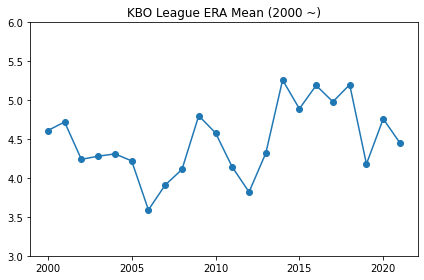

In [53]:
import matplotlib.pyplot as plt

x = range(2000, 2022)
y = era_0021
graph = plt.plot(x, y, marker='o')
plt.ylim(3, 6)
plt.title('KBO League ERA Mean (2000 ~)')
plt.tight_layout()
# plt.figure(figsize=(14,4))


plt.show()

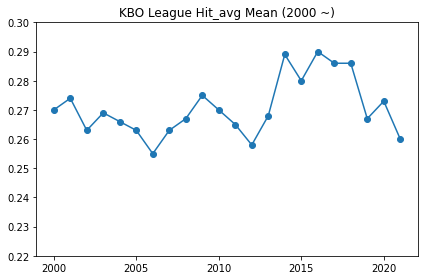

In [52]:
x = range(2000, 2022)
y = avg_0021
graph = plt.plot(x, y, marker='o')
plt.ylim(0.22, 0.3)
plt.title('KBO League Hit_avg Mean (2000 ~)')
# plt.figure(figsize=(12,6))
plt.tight_layout()

plt.show()

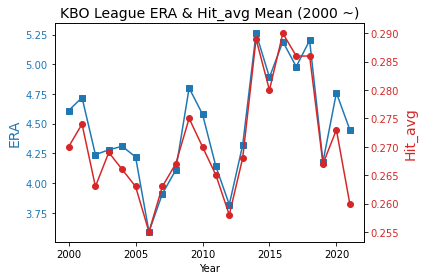

In [39]:
# plot 겹쳐그리기
x = range(2000, 2022)
fig, ax1 = plt.subplots()
color_1 = 'tab:blue' 
ax1.set_title('KBO League ERA & Hit_avg Mean (2000 ~)', fontsize=14)
ax1.set_xlabel('Year') 
ax1.set_ylabel('ERA', fontsize=14, color=color_1) 
ax1.plot(x, era_0021, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)

# 타율그래프
ax2 = ax1.twinx()
color_2 = 'tab:red'
ax2.set_ylabel('Hit_avg', fontsize=14, color=color_2)
ax2.plot(x, avg_0021, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout() # 자동으로 여백관련 파라미터 조정
plt.show()

- 리그평균 BB/9과 BABIP

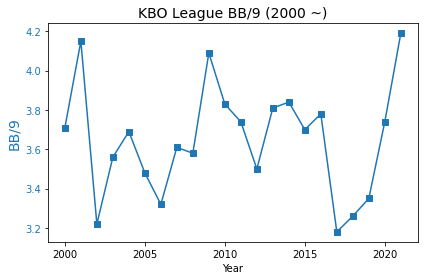

In [42]:
bb_9 = [3.71, 4.15, 3.22, 3.56, 3.69, 3.48, 3.32, 3.61, 3.58, 4.09, 3.83, 3.74, 3.50, 3.81, 3.84, 3.70, 3.78, 3.18, 3.26, 3.35, 3.74, 4.19]
babip = [0.303, 0.305, 0.300, 0.296, 0.300, 0.299, 0.290, 0.294, 0.302, 0.310, 0.308, 0.308, 0.300, 0.314, 0.330, 0.326, 0.331, 0.327, 0.329, 0.310, 0.313, 0.304]

x = range(2000, 2022)
fig, ax1 = plt.subplots()
color_1 = 'tab:blue' 
ax1.set_title('KBO League BB/9 (2000 ~)', fontsize=14)
ax1.set_xlabel('Year') 
ax1.set_ylabel('BB/9', fontsize=14, color=color_1) 
ax1.plot(x, bb_9, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)

fig.tight_layout() # 자동으로 여백관련 파라미터 조정
plt.show()

In [54]:
max(bb_9)

4.19

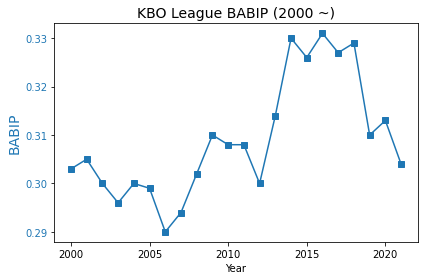

In [44]:
fig, ax1 = plt.subplots()
color_1 = 'tab:blue' 
ax1.set_title('KBO League BABIP (2000 ~)', fontsize=14)
ax1.set_xlabel('Year') 
ax1.set_ylabel('BABIP', fontsize=14, color=color_1) 
ax1.plot(x, babip, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)
fig.tight_layout() # 자동으로 여백관련 파라미터 조정
plt.show()

### 2. 확대된 스트라이크존이 도입된 이유

- 최근의 타고투저 경향
- 최근 이어진 스트라이크존 판정 논란 및 투수들의 제구력문제 (사사구 문제)
- 국제대회 기준보다 좁은 스트라이크존으로 성적 하락

### 3. 확대된 스트라이크존이 KBO에 미칠 영향

- 하이패스트볼과 종으로 떨어지는 변화구의 비중 증가
- 적극적인 타격으로 범타 증가 = 내야수비 중요성 확대
- 볼넷감소, 삼진/범타 증가 --> 경기시간 감소